In [161]:
from msvcrt import SEM_NOALIGNMENTFAULTEXCEPT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from typing import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
import warnings
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization, Dropout
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE


In [162]:
df=pd.read_csv('train_3.2.csv')
df
df.drop(['id'], axis=1)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,1534.04,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


Удалили столбей id. Нет смысловой нагрузки.

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [164]:
df.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


Все данные полны, пропусков и категориальных переменных нет

In [165]:
X=df.drop(['defects'], axis=1)
y=df['defects']

разделили на фичи и таргет

In [166]:
X_train, X_val, y_train_pd, y_val_pd = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
y_train, y_val = y_train_pd.to_numpy(), y_val_pd.to_numpy()

разбили на части

In [167]:
count = Counter(y_train)
count


Counter({False: 62959, True: 18451})

Видим дисбаланс

In [168]:
smote=SMOTE(random_state=42)
X_train, y_train=smote.fit_resample(X_train,y_train)

применили SMOTE

In [169]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [170]:
count = Counter(y_train)
count

Counter({False: 62959, True: 62959})

Отбалансировали

In [171]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['AUC']
                  )
    
    return model

In [172]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([1., 1.])

In [173]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0], 1:class_weights[1]})

Epoch 1/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7814 - loss: 0.5658 - val_AUC: 0.7775 - val_loss: 0.5916
Epoch 2/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - AUC: 0.8046 - loss: 0.5372 - val_AUC: 0.7793 - val_loss: 0.5478
Epoch 3/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - AUC: 0.8110 - loss: 0.5306 - val_AUC: 0.7734 - val_loss: 0.5318
Epoch 4/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8194 - loss: 0.5210 - val_AUC: 0.7694 - val_loss: 0.5496
Epoch 5/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - AUC: 0.8238 - loss: 0.5161 - val_AUC: 0.7716 - val_loss: 0.5167
Epoch 6/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - AUC: 0.8249 - loss: 0.5150 - val_AUC: 0.7701 - val_loss: 0.5139
Epoch 7/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - AUC: 0.8305 - loss: 0.5080 - val_AUC: 0.7633 - val_loss: 0.5715
Epoch 8/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - AUC: 0.8338 - loss: 0.5040 - val_AUC: 0.7682 - val_loss: 0.5270
Epoch 9/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 0s 9

In [174]:
history.history

{'AUC': [0.7921005487442017,
  0.8059352040290833,
  0.8141785264015198,
  0.8201154470443726,
  0.8246406316757202,
  0.8278188705444336,
  0.8308254480361938,
  0.8339160084724426,
  0.8358224034309387,
  0.8374811410903931,
  0.8388625979423523,
  0.8405757546424866,
  0.8420423269271851,
  0.8424514532089233,
  0.8452063798904419,
  0.8449864387512207,
  0.847292423248291,
  0.8473559617996216,
  0.8483339548110962,
  0.8484625816345215],
 'loss': [0.5523120164871216,
  0.536238968372345,
  0.5270621180534363,
  0.5202547907829285,
  0.5151809453964233,
  0.5114392638206482,
  0.5077422261238098,
  0.5039549469947815,
  0.5014679431915283,
  0.4994404911994934,
  0.4976555407047272,
  0.49532952904701233,
  0.49350690841674805,
  0.4925788938999176,
  0.4892197251319885,
  0.4890712797641754,
  0.4861622154712677,
  0.485758900642395,
  0.4843282401561737,
  0.4839800000190735],
 'val_AUC': [0.7775458693504333,
  0.7792614102363586,
  0.7734346985816956,
  0.7693524956703186,
  0.7

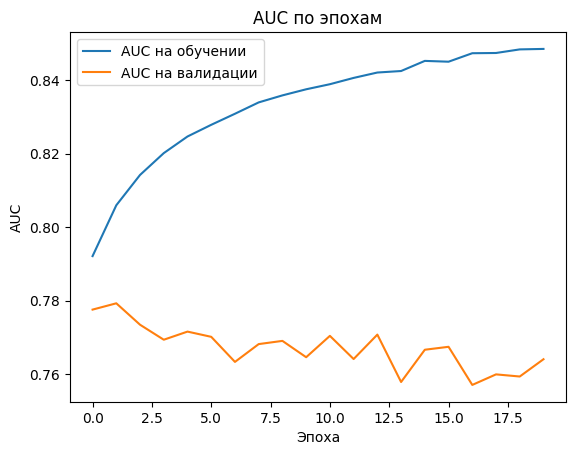

In [175]:
plt.plot(history.history['AUC'], label='AUC на обучении')
plt.plot(history.history['val_AUC'], label='AUC на валидации')
plt.title('AUC по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [176]:
val_loss, val_auc = model.evaluate(X_val, y_val)
print(f'Потери на валидации: {val_loss}, AUC на валидации: {val_auc}')

637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - AUC: 0.7692 - loss: 0.5417
Потери на валидации: 0.5460605025291443, AUC на валидации: 0.7640472054481506


In [177]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['AUC']
                  )
    
    return model

In [178]:
early_stopping = EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True, mode='max')

In [179]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256,
           class_weight={0:class_weights[0], 1:class_weights[1]})

Epoch 1/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.5234 - loss: 7.1164 - val_AUC: 0.7027 - val_loss: 1.9445
Epoch 2/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5181 - loss: 6.4642 - val_AUC: 0.6685 - val_loss: 2.2874
Epoch 3/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5155 - loss: 6.3229 - val_AUC: 0.6177 - val_loss: 2.7488
Epoch 4/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5131 - loss: 6.3331 - val_AUC: 0.6020 - val_loss: 2.8872
Epoch 5/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5153 - loss: 6.2662 - val_AUC: 0.5691 - val_loss: 3.1481
Epoch 6/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5147 - loss: 6.2345 - val_AUC: 0.5322 - val_loss: 3.4260
Epoch 7/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5166 - loss: 6.2189 - val_AUC: 0.5568 - val_loss: 3.2554
Epoch 8/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5136 - loss: 6.2099 - val_AUC: 0.5314 - val_loss: 3.4375
Epoch 9/20
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AU

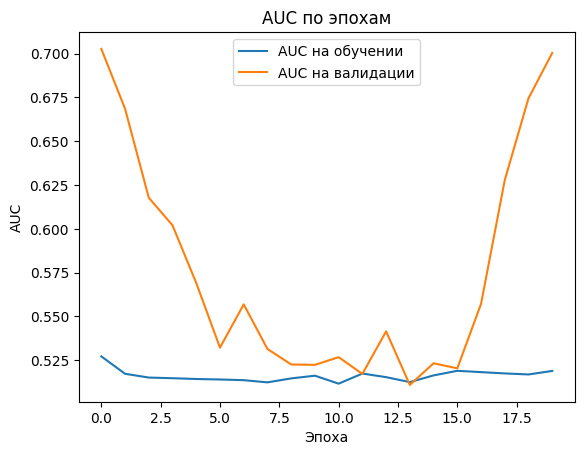

In [180]:
plt.plot(history.history['AUC'], label='AUC на обучении')
plt.plot(history.history['val_AUC'], label='AUC на валидации')
plt.title('AUC по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [181]:
val_loss, val_auc = model.evaluate(X_val, y_val)
print(f'Потери на валидации: {val_loss}, AUC на валидации: {val_auc}')

637/637 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - AUC: 0.7049 - loss: 2.1896
Потери на валидации: 2.200946569442749, AUC на валидации: 0.7003750801086426


Полученая модель показывает плохие результаты.